In [1]:
import numpy as np

from tifffile import imread, imwrite
from matplotlib import pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise
from nanopyx.core.transform._le_nlm_denoising import NLMDenoising
from nanopyx.core.transform._le_fast_nlm_denoising import NLMDenoising as FastNLMDenoising

from nanopyx.core.utils.timeit import timeit2

from nanopyx.data.download import ExampleDataManager

downloader = ExampleDataManager()
image = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True).astype(np.float32)


If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Nicolas Olivier, & Debora Keller, Zenodo, 2023 - https://doi.org/10.5281/zenodo.7620025


# Heavy thread load

Agent: NLMDenoising_ski using Threaded ran in 0.19549291700002414 seconds
(41, 41)
Agent: NLMDenoising_ski using OpenCL_Apple M1 ran in 0.4665427500000021 seconds
Agent: NLMDenoising_ski_fast using Threaded ran in 0.047103792000001476 seconds
Agent: NLMDenoising_ski_fast using OpenCL_Apple M1 ran in 0.08457870800000933 seconds


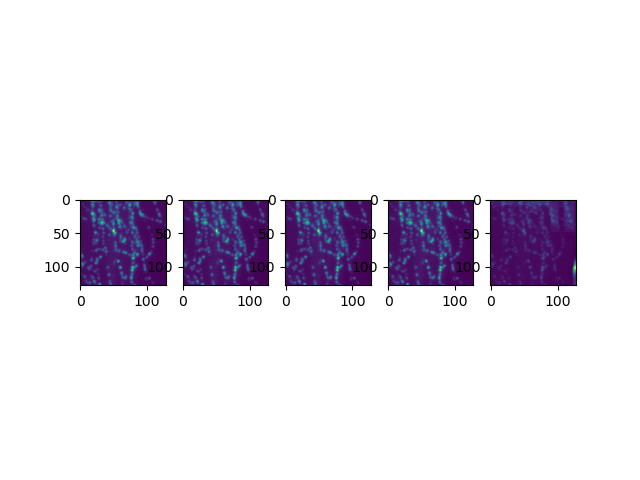

In [7]:
%matplotlib widget
denoiser = NLMDenoising(testing=True)
fdenoiser = FastNLMDenoising(testing=True)
patch_size = 40
patch_distance = 10
#img = (image - image.min()) / image.max()
img = image[0:2]
sigma = 20
h = 0.8 * sigma

#unt = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
thr = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
#pyt = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")
cl = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1")
#cl = img

#unt_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
thr_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
#pyt_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")
cl_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1")

fig,axs = plt.subplots(1,5)
axs[0].imshow(img[0])

# non fast
#axs[1].imshow(unt[1])
axs[1].imshow(thr[0])
#axs[3].imshow(pyt[1])
axs[2].imshow(cl[0])

# fast
#axs[5].imshow(unt_fast[1])
axs[3].imshow(thr_fast[0])
#axs[7].imshow(pyt_fast[1])
axs[4].imshow(cl_fast[0])
# print(cl.shape)
# plt.imshow(cl)
plt.show()


# Low thread load

Agent: NLMDenoising_ski using Threaded ran in 0.1226197090000003 seconds
(5, 5)
Agent: NLMDenoising_ski using OpenCL_Apple M1 ran in 0.07957808300000035 seconds
Agent: NLMDenoising_ski_fast using Threaded ran in 0.07366829200000069 seconds
Agent: NLMDenoising_ski_fast using OpenCL_Apple M1 ran in 0.11244208299999947 seconds


TypeError: Invalid shape (128,) for image data

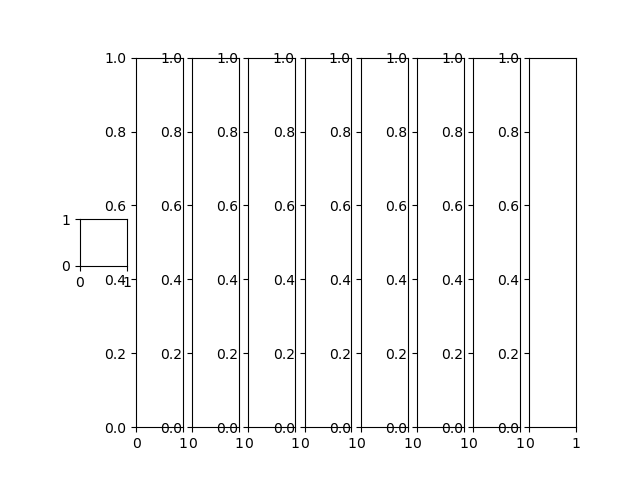

In [3]:
%matplotlib widget
denoiser = NLMDenoising(testing=True)
fdenoiser = FastNLMDenoising(testing=True)
patch_size = 5
patch_distance = 20

img = (image - image.min()) / image.max()
img = np.mean(img, axis=0)
sigma = 2
h = 0.8 * sigma

#unt = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
thr = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
#pyt = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")
cl = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1")
#cl = img

#unt_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
thr_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
#pyt_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")
cl_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1")

fig,axs = plt.subplots(1,9)
axs[0].imshow(img[1])

# non fast
#axs[1].imshow(unt[1])
axs[2].imshow(thr)
#axs[3].imshow(pyt[1])
axs[4].imshow(cl)

# fast
#axs[5].imshow(unt_fast[1])
axs[6].imshow(thr_fast)
#axs[7].imshow(pyt_fast[1])
axs[8].imshow(cl_fast)
# print(cl.shape)
# plt.imshow(cl)
plt.show()


In [ ]:
h = 2000
patch_size = 35
offset = patch_size // 2

A = ((patch_size - 1.) / 4.)
range_vals = np.arange(-offset, offset + 1, dtype=np.float32)
xg_row, xg_col = np.meshgrid(range_vals, range_vals, indexing='ij')
w = np.ascontiguousarray(np.exp(-(xg_row * xg_row + xg_col * xg_col) / (2 * A * A)), dtype=np.float32)
w *= 1. / (np.sum(w) * h * h)

print(w[18, 18])